Question 1: Implementing Linear Regression <br>

Description:<br>
Implement a simple linear regression model using Python and scikit-learn to predict house prices based on one feature: the size of the house.

Mean Absolute Error (MAE): 9.04
Mean Squared Error (MSE): 128.63
R² Score: 0.98


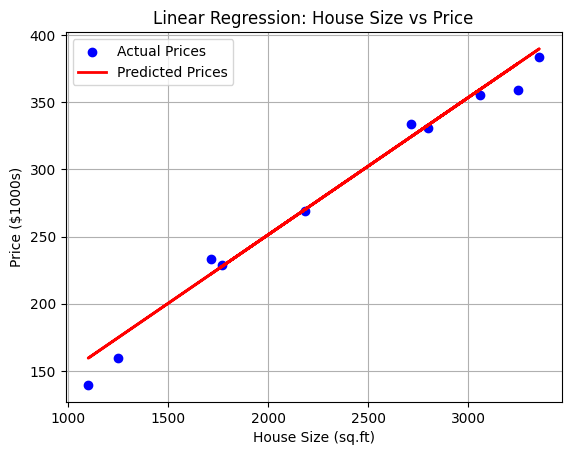

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

try:
    # Generate synthetic dataset
    np.random.seed(42)
    house_size = np.random.randint(500, 3500, 50).reshape(-1, 1)
    house_price = 50 + 0.1 * house_size + np.random.normal(0, 10, size=house_size.shape)

    # Convert to DataFrame for easy checking
    df = pd.DataFrame({'Size': house_size.flatten(), 'Price': house_price.flatten()})

    # Error handling: check for null or non-numeric values
    if df.isnull().values.any():
        raise ValueError("Dataset contains null values.")

    if not np.issubdtype(df['Size'].dtype, np.number) or not np.issubdtype(df['Price'].dtype, np.number):
        raise TypeError("Dataset must contain only numeric values.")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(df[['Size']], df['Price'], test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Plot
    plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
    plt.xlabel('House Size (sq.ft)')
    plt.ylabel('Price ($1000s)')
    plt.title('Linear Regression: House Size vs Price')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print("An error occurred:", e)
